<a href="https://colab.research.google.com/github/Ron-Rocks/AndroidIC-Dogs-and-Cats-/blob/master/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,UpSampling2D,Input,Conv2DTranspose
from tensorflow.keras.models import  Model
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

#Building the encoder model first
Encoderinputs = Input(shape = (28,28,1))
x = Conv2D(16,3,padding="same",activation = "relu")(Encoderinputs)
x = MaxPooling2D(2)(x)
x = Conv2D(8,3,padding="same",activation="relu")(x)
x = MaxPooling2D(2)(x)
x = Conv2D(8,3,padding="same",activation="relu")(x)
bottleNeck = MaxPooling2D(2,padding = "same")(x)

encoder = Model(Encoderinputs,bottleNeck)

#Now Building the decoder model -shape(4,4,8) is the output shape of the encoder model
Decoderinputs = Input(shape = (4,4,8,))
y = Conv2D(8,3,padding="same",activation = "relu")(Decoderinputs)
y = UpSampling2D(2)(y)
y = Conv2D(8,3,activation = "relu",padding="same")(y)
y = UpSampling2D(2)(y)
y = Conv2D(16,3,activation="relu")(y)
y = UpSampling2D(2)(y)
y = Conv2D(1,3,activation = "sigmoid",padding = "same")(y)

decoder = Model(Decoderinputs,y)

(xTrain,_),(xTest,_) = fashion_mnist.load_data()
xTrain = (xTrain.reshape(-1,28,28,1))/255
xTest = xTest.reshape(-1,28,28,1)/255

# Defining the input of the combined autoencoder
inputs = Input(shape = (28,28,1,))
encoded = encoder(inputs)
decoded = decoder(encoded)

autoEncoder = Model(inputs,decoded)

autoEncoder.summary()
encoder.summary()
decoder.summary()

autoEncoder.compile(optimizer="adam",loss = "binary_crossentropy",metrics= ["accuracy"])
autoEncoder.fit(xTrain,xTrain,epochs=20,validation_data=(xTest,xTest))



In [0]:
prediction = autoEncoder.predict(xTest)
encoded = encoder.predict(xTest)

plt.figure()
print("Actual - ")
plt.imshow(xTest[12].reshape(28,28))
plt.show()

print("Encoded -")
plt.imshow(encoded[12].reshape(4,32))
plt.show()

print("Decoded - ")
plt.imshow(prediction[12].reshape(28,28))
plt.show()



# Trying the same model for Regular MNIST -

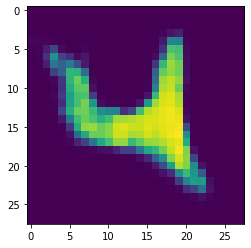

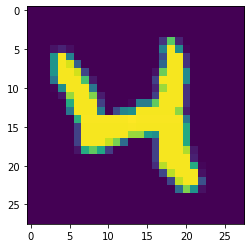

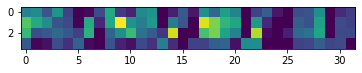

In [0]:
from keras.datasets import mnist

(xTrainM,_) ,(_,_)= mnist.load_data()
xTrainM = xTrainM.reshape(-1,28,28,1)/255
prediction = autoEncoder.predict(xTrainM)
encoded = encoder.predict(xTrainM)
n = 20
plt.figure()
plt.imshow(prediction[n].reshape(28,28))
plt.show()
plt.imshow(xTrainM[n].reshape(28,28))
plt.show()
plt.imshow(encoded[n].reshape(4,32))
plt.show()
